In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [173]:
df = pd.read_json('../data/data.json')

In [174]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [175]:
def fraud_or_not(val):
    if 'fraud' in val:
        return 1
    else:
        return 0
    
df['fraud'] = df['acct_type'].apply(fraud_or_not)
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,1
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,1374,1241625346,4,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA,0
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,84,1353386971,4,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA,0
14335,tos_warn,1361361600,10873,8,US,USD,0.0,"<p style=""font-family: 'Helvetica Neue', Helve...",velvetlist.com,1360376285,...,812,1290204991,3,2297 Cedar Ave,US,40.862283,-73.911363,Salsa con fuego,NY,0


In [168]:
df.columns

Index(['body_length', 'description', 'email_domain', 'fb_published',
       'has_analytics', 'has_logo', 'listed', 'name_length', 'num_payouts',
       'org_facebook', 'org_twitter', 'show_map', 'user_age', 'fraud',
       'time_to_event', 'event_length', 'channels__0', 'channels__4',
       'channels__5', 'channels__6', 'channels__7', 'channels__8',
       'channels__9', 'channels__10', 'channels__11', 'channels__12',
       'channels__13', 'delivery_method__0.0', 'delivery_method__1.0',
       'delivery_method__3.0', 'user_type__1', 'user_type__2', 'user_type__3',
       'user_type__4', 'user_type__5', 'user_type__103', 'currency__AUD',
       'currency__CAD', 'currency__EUR', 'currency__GBP', 'currency__MXN',
       'currency__NZD', 'currency__USD', 'payout_type__', 'payout_type__ACH',
       'payout_type__CHECK', 'pop_country', 'country_is_null',
       'venue_country_is_null', 'country_is_venue', 'avg_ticket_price',
       'tot_ticket_available', 'avg_cost_per_ticket'],
      dtyp

In [169]:
fraud_grouped = df.groupby('fraud')
fraud_grouped.describe()

body_length                                                         \
            count         mean          std  min    25%     50%      75%   
fraud                                                                      
False     13044.0  3886.994557  5889.318489  0.0  904.0  2164.0  4567.25   
True       1293.0  1508.886311  3550.299892  0.0    0.0   452.0  1669.00   

               fb_published            ... tot_ticket_available              \
           max        count      mean  ...                  75%         max   
fraud                                  ...                                    
False  65535.0      13044.0  0.137841  ...                300.0   2000000.0   
True   54648.0       1293.0  0.022428  ...                250.0  30500000.0   

      avg_cost_per_ticket                                                     \
                    count       mean         std     min       25%       50%   
fraud                                                                          
False             13044.0   8.265149  188.201483 -0.0008  0.054718  0.212034   
True               1293.0  14.586104  163.746795  0.0000  0.055500  0.500000   

                           
            75%       max  
fraud                      
False  1.000000  15989.80  
True   3.589744   4141.65  

[2 rows x 368 columns]

In [170]:
df.groupby('country').unique()

KeyError: 'country'

In [ ]:
df['country'].unique()

In [ ]:
df.groupby('country')['fraud'].describe()

In [ ]:
df.groupby('currency')

In [144]:
df['sale_duration']

0        29.0
1        28.0
2        54.0
3         0.0
4        63.0
         ... 
14332    11.0
14333    55.0
14334    81.0
14335     6.0
14336     0.0
Name: sale_duration, Length: 14337, dtype: float64

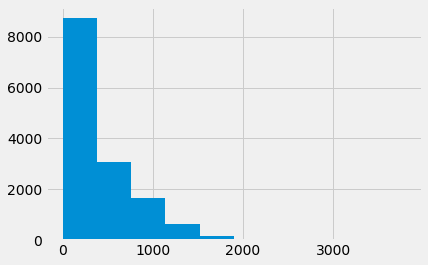

In [145]:
fig, ax = plt.subplots()
ax.hist(df['user_age']);

In [146]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

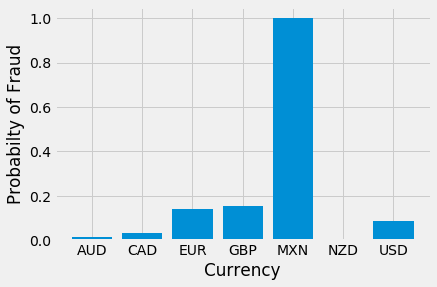

In [176]:
curr_val = df.groupby('currency')['fraud'].mean().values
curr_id = df.groupby('currency')['fraud'].mean().index
fig, ax = plt.subplots()
ax.bar(curr_id, curr_val)
ax.set_xlabel('Currency')
ax.set_ylabel('Probabilty of Fraud')
plt.savefig('../imgs/currency_fraud.png');

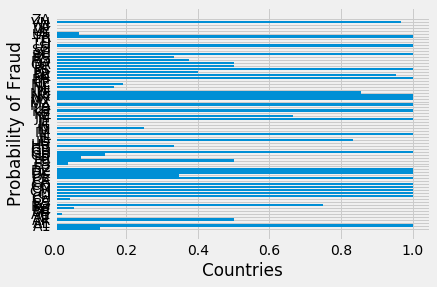

In [148]:
country_val = df.groupby('country')['fraud'].mean().values
country_id = df.groupby('country')['fraud'].mean().index
fig, ax = plt.subplots()
ax.barh(country_id, country_val)
ax.set_xlabel('Countries')
ax.set_ylabel('Probability of Fraud');

In [149]:
df.groupby('country').count()[:20]

,acct_type,approx_payout_date,body_length,channels,currency,delivery_method,description,email_domain,event_created,event_end,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
country,,,,,,,,,,,,,,,,,,,,,
,316,316,316,316,316,316,316,316,316,316,...,316,316,316,316,287,287,287,287,287,316
A1,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,20,20,20,20,20,25
AE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AR,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
AT,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
AU,742,742,742,742,742,742,742,742,742,742,...,742,742,742,742,701,701,701,701,701,742
BB,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BE,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,15,15,15,15,15,18
BG,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,2,2,2,2,2,4


In [150]:
df['country'].value_counts()[:10]

US    9234
GB    2083
CA    1262
AU     742
       316
NZ      73
IE      48
MA      47
DE      43
FR      40
Name: country, dtype: int64

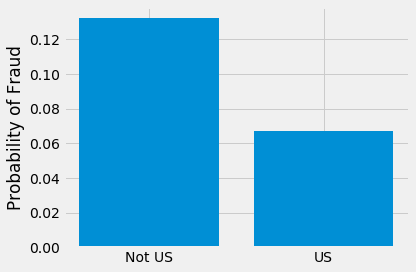

In [177]:
def us_or_not(val):
    if val == 'US':
        return 1
    else:
        return 0

df['us_or_not'] = df['country'].apply(us_or_not)
us = df.groupby('us_or_not')['fraud'].mean()
us_id = us.index
us_val = us.values

fig, ax = plt.subplots()
ax.bar(us_id, us_val)
ax.set_xticks([0,1])
ax.set_xticklabels(['Not US', 'US'])
ax.set_ylabel('Probability of Fraud')
plt.tight_layout()
plt.savefig('../imgs/country_fraud.png');


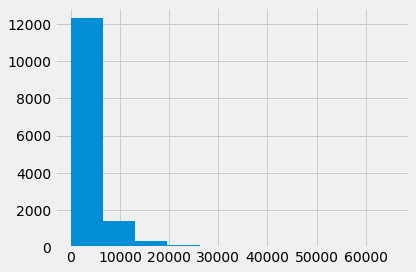

In [178]:
def descrip_len(val):
    return len(val)

df['descrip_len'] = df['description'].apply(descrip_len)
df.descrip_len.hist()
plt.tight_layout();

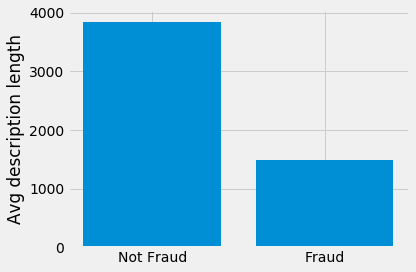

In [179]:
descrip_len = df.groupby('fraud')['descrip_len'].mean().values
fraud_or_not = df.groupby('fraud')['descrip_len'].mean().index

fig, ax = plt.subplots()
ax.bar(fraud_or_not, descrip_len)
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel('Avg description length')
plt.tight_layout()
plt.savefig('../imgs/descrip_len_by_fraud.png');

In [154]:
fraud_or_not = df.groupby('fraud')['user_age'].median().index


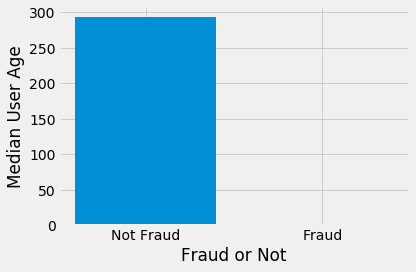

In [180]:
fraud_or_not = df.groupby('fraud')['user_age'].median().index
user_age_vals = df.groupby('fraud')['user_age'].median().values
fig, ax = plt.subplots()
ax.bar(fraud_or_not, user_age_vals)
ax.set_xlabel('Fraud or Not')
ax.set_ylabel('Median User Age')
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.savefig('../imgs/med_by_fraud.png');

In [156]:
df.groupby('fraud')['user_age'].mean()

fraud
0    402.683073
1     87.152359
Name: user_age, dtype: float64

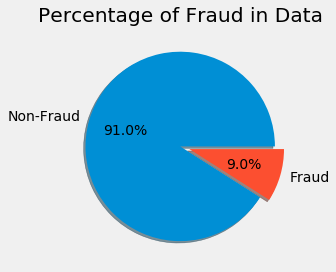

In [181]:
df.fraud.value_counts()
non_fraud_count = df.fraud.value_counts().values[0]/df.shape[0]
fraud_count = df.fraud.value_counts().values[1]/df.shape[0]

labels = ['Non-Fraud', 'Fraud']
size = [non_fraud_count, fraud_count]
fig, ax = plt.subplots()
ax.pie(size, labels=labels, explode=[0,.1], autopct='%1.1f%%', shadow=True)
ax.set_title('Percentage of Fraud in Data')
plt.tight_layout()
plt.savefig('../imgs/percentage_of_fraud.png');

In [ ]:
len(df.previous_payouts[1])

In [183]:
def len_prev_payouts(val):
    return len(val)

df['num_prev_payouts'] = df['previous_payouts'].apply(len_prev_payouts)
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,us_or_not,descrip_len,num_prev_payouts
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,1,3687,0
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0,1,3499,49
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0,1,2601,36
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,,None,NaN,NaN,None,None,0,0,12347,21
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0,1,2417,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,1,1,667,0
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA,0,1,5812,5
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA,0,0,557,1
14335,tos_warn,1361361600,10873,8,US,USD,0.0,"<p style=""font-family: 'Helvetica Neue', Helve...",velvetlist.com,1360376285,...,2297 Cedar Ave,US,40.862283,-73.911363,Salsa con fuego,NY,0,1,10873,128


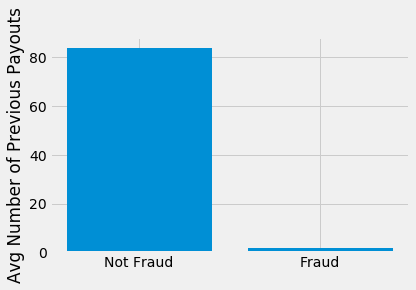

In [184]:
fraud_or_not = df.groupby('fraud').num_prev_payouts.mean().index
num_payouts = df.groupby('fraud').num_prev_payouts.mean().values

fig, ax = plt.subplots()
ax.bar(fraud_or_not, num_payouts)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel('Avg Number of Previous Payouts')
plt.tight_layout()
plt.savefig('../imgs/avg_prev_payouts_by_fraud.png');